In [104]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns 
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors
sys.path.append("../")
PATH = "../.."

from func_dimRed import func_dimRed, func_plot_dimRed
from func_preprocess import read_data, subset_wo_missigness, remove_NA, parseVariables, clean_data, impute_scale 



In [2]:
resPath = f"{PATH}/results/10_clustering"
os.makedirs(resPath, exist_ok=True)

In [139]:
varDecoding = {
    False: "",
    "gender":"gender",
    "age_erstmanifestation":"age at disease onset",
    "Diagnosedauer":"time to diagnosis ",
    "achrak_rb":"Anti-AChR ab",
    "antimuskak_rb":"Anti-MuSK ab",
    "pyridostigmin_sprb":"medication with pyridostigmine",
    "thymektomie_gr":"thymectomy",
    "immuntherapie_grrb":"therapy with \nimmunosuppressants",
    "exazerbationstherapie_grrb":"excerbation\n therapy",
    "eskalationstherapiebeitherapierefraktaerermyasthenie_grrb":"escalation therapy",
    "autoimmunerkrankungen_rbzu":"AID (other)",
    "scoreadl_neu":"MG-ADL",
    "mgfaklassifikation_schlimmste_historisch_rb":"MGFA (worst)",
    "aktuelle_MGFA_umkodiert":"MGFA (current)",
    "muskelschmerz":"muscle pain",
    "zn_myasthener_exazerbation":"previous MG exacerbation",
    "chronicfatigue_normalised":"chronicfatigue (norm.)",
    "category":"category"
}

# Load and preprocess dataset

In [3]:
''' 1. read data '''
data = read_data(PATH, FILENAME="fullRegistry")   #"all_data_edited_v3_mgfaRecoded_inverse"

''' 
2. OPTIONAL: make subanalysis for variables with high missigness 
specify which variable should be kept in the dataset; remove rest of vars with too much missigness

var_subset_analysis = False    --> no subanalysis
var_subset_analysis = ["variable 1", "variable 2", ...]  e.g. ["histologie", "dekrement_testergebnis"]          --> subanalysis!

'''
#######
var_subset_analysis =  False
#######
if var_subset_analysis: 
    data = subset_wo_missigness(data, var_subset_analysis)
data_clean = remove_NA(data, cutoff_perc=35)

''' 
3. OPTIONAL. remove problematic variables (correlated or else)
'''
vars2remove = pd.read_csv(f"{PATH}/data/variables_to_remove_clustering.txt", header=None)[0].tolist()           
data_clean_parsed = parseVariables(data_clean, vars2remove)

''' 
4. clean variables; e.g. MGFA classification
'''
data_clean_parsed = clean_data(data_clean_parsed)

''' 
5. impute and scale
`df_imputedScaled` = scaled dataset for clustering algorithm
`df_reverseTransform` = unscaled "normal" values for plotting - makes it easier to interpret plot
'''
df_imputedScaled, df_reverseTransform = impute_scale(data_clean_parsed, ohe_yn=False)
print(df_imputedScaled.shape)


''' 
6. add PID again
'''
df_imputedScaled.index = data_clean_parsed.index
df_reverseTransform.index = data_clean_parsed.index



LOADING DATA


REMOVING MISSINGNESS (cutoff=35%)
Keeping 35/40 variables
Discarded: ['testergebnisdekrement_rb', 'testergebnispyridostigmin_rb', 'lrp4antikoerper_rb', 'histologie_sprb', 'scoreqmg_neu']


REMOVING BIASING / UNWANTED VARIABLES
Discarded: ['zn_myasthener_krise_jn', 'aktueller_mgfa_score', 'okulaer', 'bulbaer', 'generalisiertemuskelschwaeche', 'kortison_sprb', 'azathioprin_sprb', 'methotrexatfolsauure_sprb', 'mycophenolatmofetil_sprb', 'eculizumab_sprb', 'rituximab_sprb', 'plasmapherese_sprb', 'immunadsorption_sprb', 'ivig_sprb', 'age', 'age_bei_diagnose', 'scoreqol_neu', 'chronicfatigue_neu', 'seelischesbefinden_neu']
(1814, 16)


CLEANING DATASET


IMPUTING & SCALING


(1814, 16)


In [4]:
df_imputedScaled.columns

Index(['age_erstmanifestation', 'Diagnosedauer', 'scoreadl_neu',
       'chronicfatigue_normalised', 'gender', 'zn_myasthener_exazerbation',
       'muskelschmerz', 'autoimmunerkrankungen_rbzu', 'achrak_rb',
       'antimuskak_rb', 'thymektomie_gr', 'pyridostigmin_sprb',
       'immuntherapie_grrb',
       'eskalationstherapiebeitherapierefraktaerermyasthenie_grrb',
       'exazerbationstherapie_grrb',
       'mgfaklassifikation_schlimmste_historisch_rb'],
      dtype='object')

In [5]:
df_reverseTransform.head()

,age_erstmanifestation,Diagnosedauer,scoreadl_neu,chronicfatigue_normalised,gender,zn_myasthener_exazerbation,muskelschmerz,autoimmunerkrankungen_rbzu,achrak_rb,antimuskak_rb,thymektomie_gr,pyridostigmin_sprb,immuntherapie_grrb,eskalationstherapiebeitherapierefraktaerermyasthenie_grrb,exazerbationstherapie_grrb,mgfaklassifikation_schlimmste_historisch_rb
pid,,,,,,,,,,,,,,,,
P7X50M0V,61.000000,0.000000,1.000000,0.575758,1,0,0,0,1,1,0,1,1,0,0,5
0X13811D,39.000000,2.000000,15.000000,0.333333,1,0,1,1,1,0,1,1,1,0,0,2
002D7Y7Z,54.000000,3.000000,9.000000,0.636364,1,0,1,0,1,0,1,1,1,0,0,2
002G71A3,64.000000,0.000000,0.882707,0.652819,0,0,0,0,1,0,0,1,0,0,0,1
00C4EK1J,56.809598,4.693673,4.857229,0.530152,0,0,0,0,1,0,0,1,1,0,0,2


# Run unsupervised clustering

In [6]:
# pca_varRatio, df_dimRed = func_dimRed(df_imputedScaled, random_state=None)  #11

# ### Save clustering results
# with open(f"{resPath}/pca_varRatio.pickle", "wb") as f: 
#     pickle.dump(pca_varRatio, f)

# with open(f"{resPath}/dataframe_dimRed.pickle", "wb") as f: 
#     pickle.dump(df_dimRed, f)


/home/WUR/katz001/miniconda3/envs/env_myaReg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PC1 (explained variance: 0.21)
PC2 (explained variance: 0.15)


# Load unsupervised clustering

In [73]:
with open(f"{resPath}/pca_varRatio.pickle", "rb") as f: 
    pca_varRatio = pickle.load(f)

with open(f"{resPath}/dataframe_dimRed.pickle", "rb") as f: 
    df_dimRed = pickle.load(f)

## Plot - gender

In [75]:
varInterest = "gender"
coloring = df_reverseTransform[varInterest].copy().reset_index().drop(["pid"], axis=1).iloc[:,0]

df_dimRed = pd.concat([df_dimRed, coloring], axis=1, ignore_index=True)  
df_dimRed.columns = ["pc1", "pc2", "t-SNE1", "t-SNE2","umap1", "umap2", "coloring"]

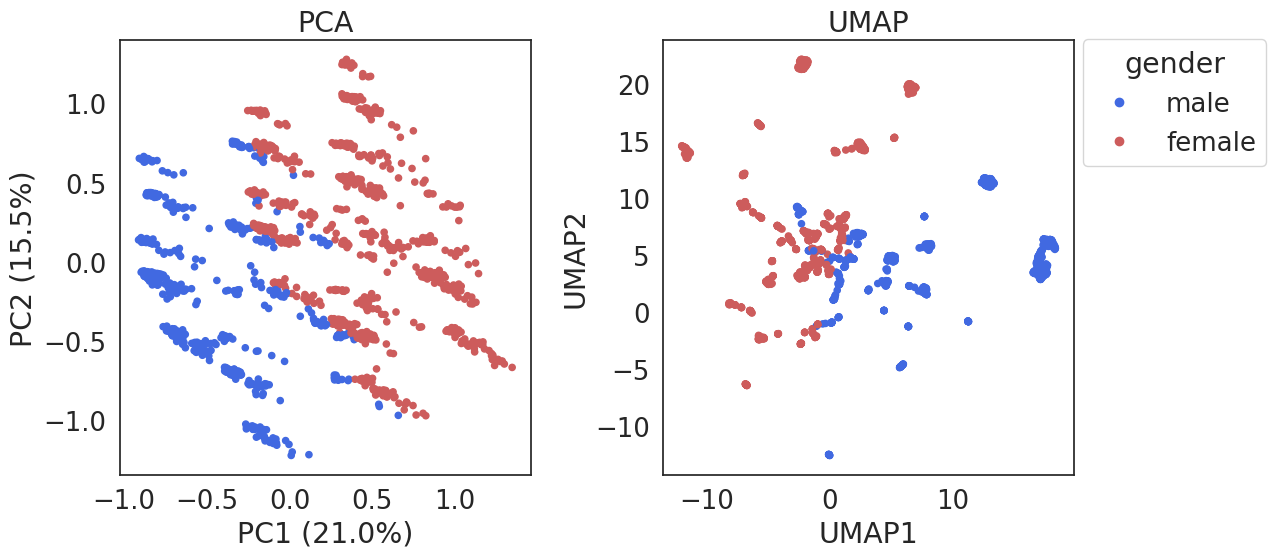

In [110]:
sns.set_theme(style="white", font_scale=1.7)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue","indianred"])


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13.5,6))
ax1.scatter(df_dimRed["pc1"], df_dimRed["pc2"], c=df_dimRed.iloc[:,-1], s=20, cmap=cmap)
plott = ax2.scatter(df_dimRed["umap1"], df_dimRed["umap2"], c=df_dimRed.iloc[:,-1], s=20, cmap=cmap)
### Stylise labels
ax1.set_xlabel(f"PC1 ({round((pca_varRatio[0]*100),1)}%)")
ax1.set_ylabel(f"PC2 ({round((pca_varRatio[1]*100),1)}%)")
ax1.set_title("PCA")
ax2.set_xlabel(f"UMAP1")
ax2.set_ylabel(f"UMAP2")
ax2.set_title("UMAP")

plt.legend(handles=plott.legend_elements()[0], labels=["male", "female"], title="gender", bbox_to_anchor=(1.5, 1.03))
plt.tight_layout()

fig.savefig(f"{PATH}/figures/publication/clustering_{varInterest}.png", dpi=300)    

# if savefig:
    # os.makedirs(f"figures/clustering", exist_ok=True)
    # plt.tight_layout()
    # fig.savefig(f"figures/clustering/clustering_{varInterest}.png", dpi=300)    


## Plot - others

In [151]:
with open(f"{resPath}/pca_varRatio.pickle", "rb") as f: 
    pca_varRatio = pickle.load(f)

with open(f"{resPath}/dataframe_dimRed.pickle", "rb") as f: 
    df_dimRed = pickle.load(f)

In [152]:
varInterest = "thymektomie_gr"
coloring = df_reverseTransform[varInterest].copy().reset_index().drop(["pid"], axis=1).iloc[:,0]

df_dimRed = pd.concat([df_dimRed, coloring], axis=1, ignore_index=True)  
df_dimRed.columns = ["pc1", "pc2", "t-SNE1", "t-SNE2","umap1", "umap2", "coloring"]

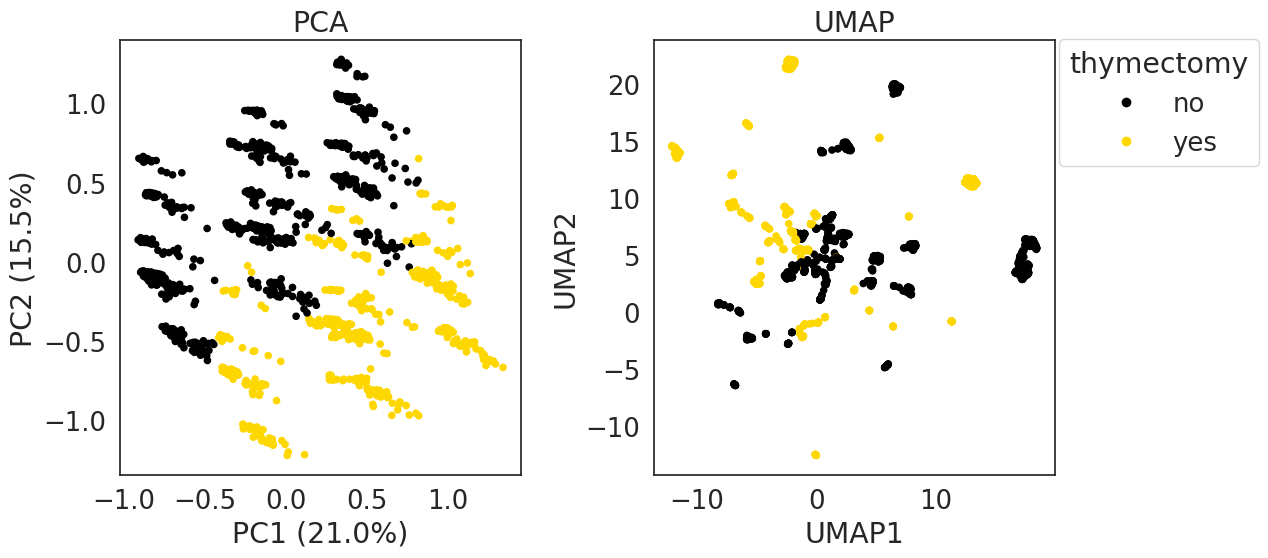

In [156]:
sns.set_theme(style="white", font_scale=1.7)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","gold"])


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13.5,6))
ax1.scatter(df_dimRed["pc1"], df_dimRed["pc2"], c=df_dimRed.iloc[:,-1], s=20, cmap=cmap)
plott = ax2.scatter(df_dimRed["umap1"], df_dimRed["umap2"], c=df_dimRed.iloc[:,-1], s=20, cmap=cmap)
### Stylise labels
ax1.set_xlabel(f"PC1 ({round((pca_varRatio[0]*100),1)}%)")
ax1.set_ylabel(f"PC2 ({round((pca_varRatio[1]*100),1)}%)")
ax1.set_title("PCA")
ax2.set_xlabel(f"UMAP1")
ax2.set_ylabel(f"UMAP2")
ax2.set_title("UMAP")

plt.legend(handles=plott.legend_elements()[0], labels=["no", "yes"], title=varDecoding[varInterest], bbox_to_anchor=(1.54, 1.03))
plt.tight_layout()

fig.savefig(f"{PATH}/figures/publication/clustering_{varInterest}.png", dpi=300)    

